In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import keras

Using TensorFlow backend.


In [4]:
mnist = pd.read_csv('train.csv')

In [5]:
mnist

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11         9       0       0       0       0       0       0       0       0   
12         1       0       0       0       0       0       0       0       0   
13         3       0       0       0       0       0       0       0       0   
14         3       0       0       0       0       0       0       0       0   
15         1       0       0       0       0       0       0       0       0   
16         2       0       0       0       0       0       0       0       0   
17         0       0       0       0       0       0       0       0       0   
18         7       0       0       0       0       0       0       0       0   
19         5       0       0       0       0       0       0       0       0   
20         8       0       0       0       0       0       0       0       0   
21         6       0       0       0       0       0       0       0       0   
22         2       0       0       0       0       0       0       0       0   
23         0       0       0       0       0       0       0       0       0   
24         2       0       0       0       0       0       0       0       0   
25         3       0       0       0       0       0       0       0       0   
26         6       0       0       0       0       0       0       0       0   
27         9       0       0       0       0       0       0       0       0   
28         9       0       0       0       0       0       0       0       0   
29         7       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41970      2       0       0       0       0       0       0       0       0   
41971      3       0       0       0       0       0       0       0       0   
41972      4       0       0       0       0       0       0       0       0   
41973      4       0       0       0       0       0       0       0       0   
41974      3       0       0       0       0       0       0       0       0   
41975      9       0       0       0       0       0       0       0       0   
41976      2       0       0       0       0       0       0       0       0   
41977      4       0       0       0       0       0       0       0       0   
41978      4       0       0       0       0       0       0       0       0   
41979      4       0       0       0       0       0       0       0       0   
41980      7       0       0       0       0       0       0       0       0   
41981      2       0       0       0       0       0       0       0       0   
41982      8       0       0       0       0       0       0       0       0   
41983      7       0       0       0       0       0       0       0       0   
41984      3       0       0       0       0       0       0       0       0   
41985      3       0       0       0       0       0       0       0       0   
41986      0       0       0       0       0       0       0       0       0   
41987      5       0       0       0       0       0       0       0       0   
41988  

In [6]:
mnist = mnist.values

In [7]:
type(mnist)

numpy.ndarray

In [8]:
mnist.shape

(42000, 785)

In [19]:
#Getting the 784 pixel values
mnist_data = mnist[: ,1:]
#Getting the label
mnist_label = mnist[:, 0:1]

In [10]:
mnist_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
mnist_label

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

In [20]:
#Categorizing the labels
mnist_label_cat = keras.utils.to_categorical(mnist_label,num_classes=10)

In [13]:
mnist_label_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
#Inputs
X = mnist_data

In [22]:
#Categorical output
y = mnist_label_cat

In [14]:
#seq. module
from keras.models import Sequential
#Dense
from keras.layers import Dense
#Drop out
#you can apply dropout to 1 or more layers
from keras.layers import Dropout

In [15]:
classifier = Sequential()

In [16]:
#First hidden layer
classifier.add(Dense(units=397,activation='relu',kernel_initializer='uniform',input_shape=(784,)))
classifier.add(Dropout(rate=0.3))

#Second hidden layer
classifier.add(Dense(units=397,activation='relu',kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.3))

In [17]:
#Output layer
classifier.add(Dense(units=10,kernel_initializer = 'uniform',activation='softmax'))

In [18]:
#Compilation
classifier.compile(optimizer='Adam',loss='categorical_crossentropy',metrics= ['accuracy'])

In [367]:
classifier.fit(X,y,batch_size=100,epochs=50)

Epoch 1/50
42000/42000 [==============================] - 8s 191us/step - loss: 2.3690 - acc: 0.7886
Epoch 2/50
42000/42000 [==============================] - 8s 179us/step - loss: 0.2681 - acc: 0.9271
Epoch 3/50
42000/42000 [==============================] - 7s 177us/step - loss: 0.2038 - acc: 0.9414
Epoch 4/50
42000/42000 [==============================] - 8s 185us/step - loss: 0.1792 - acc: 0.9471
Epoch 5/50
42000/42000 [==============================] - 8s 189us/step - loss: 0.1760 - acc: 0.9510
Epoch 6/50
42000/42000 [==============================] - 8s 189us/step - loss: 0.1822 - acc: 0.9494
Epoch 7/50
42000/42000 [==============================] - 8s 186us/step - loss: 0.1809 - acc: 0.9496
Epoch 8/50
42000/42000 [==============================] - 8s 194us/step - loss: 0.1823 - acc: 0.9529
Epoch 9/50
42000/42000 [==============================] - 8s 196us/step - loss: 0.1786 - acc: 0.9544
Epoch 10/50
42000/42000 [==============================] - 8s 184us/step - loss: 0.1713 - a

In [368]:
#Getting test data
mnist_test = pd.read_csv('test.csv')

In [369]:
mnist_test

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0       0   
11          0       0       0       0       0       0       0       0       0   
12          0       0       0       0       0       0       0       0       0   
13          0       0       0       0       0       0       0       0       0   
14          0       0       0       0       0       0       0       0       0   
15          0       0       0       0       0       0       0       0       0   
16          0       0       0       0       0       0       0       0       0   
17          0       0       0       0       0       0       0       0       0   
18          0       0       0       0       0       0       0       0       0   
19          0       0       0       0       0       0       0       0       0   
20          0       0       0       0       0       0       0       0       0   
21          0       0       0       0       0       0       0       0       0   
22          0       0       0       0       0       0       0       0       0   
23          0       0       0       0       0       0       0       0       0   
24          0       0       0       0       0       0       0       0       0   
25          0       0       0       0       0       0       0       0       0   
26          0       0       0       0       0       0       0       0       0   
27          0       0       0       0       0       0       0       0       0   
28          0       0       0       0       0       0       0       0       0   
29          0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27970       0       0       0       0       0       0       0       0       0   
27971       0       0       0       0       0       0       0       0       0   
27972       0       0       0       0       0       0       0       0       0   
27973       0       0       0       0       0       0       0       0       0   
27974       0       0       0       0       0       0       0       0       0   
27975       0       0       0       0       0       0       0       0       0   
27976       0       0       0       0       0       0       0       0       0   
27977       0       0       0       0       0       0       0       0       0   
27978       0       0       0       0       0       0       0       0       0   
27979       0       0       0       0       0       0       0       0       0   
27980       0       0       0       0       0       0       0       0       0   
27981       0       0       0       0       0       0       0       0       0   
27982       0       0       0       0       0       0       0       0       0   
27983       0       0       0       0       0       0       0       0       0   
27984       0       0       0       0       0       0       0       0       0   
27985       0       0       0       0       0       0       0       0       0   
27986       0       0       0       0       0       0       0       0       0   
27987       0       0       0       0 

In [376]:
mnist_test.shape

(28000, 784)

In [377]:
#Making predictions on test data
pred_test = classifier.predict(mnist_test)

In [378]:
pred_test.shape

(28000, 10)

In [379]:
pred_test

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.0523825e-16, 1.2728968e-18, 1.8446603e-15, ..., 9.0463997e-13,
        2.8217335e-06, 9.9996376e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.1369593e-10, 1.2383706e-18, 2.3925275e-11, ..., 1.9111210e-10,
        1.3546606e-06, 9.9999571e-01],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [380]:
#pred_test.shape

(28000, 10)

In [381]:
#pred_test[3]

array([0.08207233, 0.06301781, 0.09117657, 0.09067139, 0.0681142 ,
       0.09190463, 0.06855926, 0.09029564, 0.20354265, 0.15064551],
      dtype=float32)

In [382]:
#np.amax(pred_test[3])

0.20354265

In [ ]:
#Converting categorical output into original labels

In [383]:
for i in range(0,28000):
    for j in range(0,10):
        if pred_test[i][j] != np.amax(pred_test[i]):
            pred_test[i][j] = 0

In [384]:
pred_test[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.20354265, 0.        ],
      dtype=float32)

In [385]:
pred_test_digit = []

for i in range(0,28000):
    for j in range(0,10):
        if pred_test[i][j] >0:
            pred_test_digit.append(j)

In [386]:
pred_test_digit = np.array(pred_test_digit)

In [387]:
pred_test_digit.shape

(28000,)

In [388]:
mnist_sub = pd.DataFrame({'ImageId':mnist_test.index,'Label': pred_test_digit})

In [389]:
mnist_sub

ImageId  Label
0            0      2
1            1      0
2            2      9
3            3      8
4            4      3
5            5      7
6            6      0
7            7      3
8            8      0
9            9      3
10          10      5
11          11      7
12          12      4
13          13      0
14          14      4
15          15      8
16          16      3
17          17      1
18          18      9
19          19      0
20          20      9
21          21      1
22          22      1
23          23      5
24          24      7
25          25      4
26          26      2
27          27      7
28          28      4
29          29      7
...        ...    ...
27970    27970      5
27971    27971      0
27972    27972      4
27973    27973      8
27974    27974      0
27975    27975      3
27976    27976      6
27977    27977      0
27978    27978      1
27979    27979      9
27980    27980      3
27981    27981      1
27982    27982      1
27983    27983      0
27984    27984      4
27985    27985      5
27986    27986      2
27987    27987      2
27988    27988      9
27989    27989      6
27990    27990      7
27991    27991      6
27992    27992      1
27993    27993      9
27994    27994      7
27995    27995      9
27996    27996      7
27997    27997      3
27998    27998      9
27999    27999      2

[28000 rows x 2 columns]

In [390]:
mnist_sub.to_csv('mnist_ANN.csv',index=False)

In [391]:
mnist_sub['ImageId'] = mnist_sub['ImageId']+1

In [392]:
mnist_sub.to_csv('mnist_ANN.csv',index=False)

In [393]:
mnist_test_val = mnist_test.values

In [396]:
sample = mnist_test_val[3].reshape(28,28)

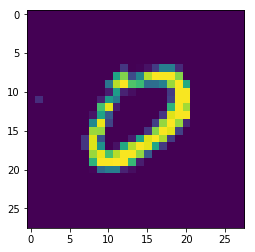

In [397]:
plt.imshow(sample)

In [ ]:
#97% accuracy on submission